# PA 3: Association Analysis - Apriori/FP Growth

## Tasks

1.    Load the dataset (from the csv file)

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install mlxtend --upgrade
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
import time
from sklearn import preprocessing
# Write your code here

# loading dataset
df = pd.read_csv('dataset3.csv')
df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [ ]:
# Write your code here

# Checking for any null values or empty strings
print(df.isnull().sum())


Unnamed: 0      0
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.    Encode the dataset

In [ ]:
le = preprocessing.LabelEncoder()

for i in df:
  df[i] = le.fit_transform(df[i])

df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
3,3,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0
4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
995,995,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0
996,996,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
997,997,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,1


For each of the combinations in tasks 4 & 5, print the output in the following Sample format:

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [ ]:
# Write your code here
combinations = [
    {'support': 0.02, 'confidence': 0.1},
    {'support': 0.05, 'confidence': 0.3},
    {'support': 0.1, 'confidence': 0.5}
]

# Loop over the combinations and generate the rules
for comb in combinations:
  # Run Apriori algorithm
  frequent_itemsets = apriori(df.iloc[:,1:], min_support=comb['support'], use_colnames=True)

# Generate association rules
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=comb['confidence'])
# Print the output in the desired format
  print("Support = {}".format(comb['support']))
  print("Confidence = {}".format(comb['confidence']))
  print("Total Number of Association Rules: {}".format(len(rules)))
  print("Top 5 rules ordered by confidence descending:")
  display(rules.sort_values(by=['confidence'], ascending=False).head(5))

#Dictionay storing itemset with same support count key
  fredic = {}
#all unique support count
  su = frequent_itemsets.support.unique()

  for i in range(len(su)):
      inset = list(frequent_itemsets.loc[frequent_itemsets.support ==su[i]]['itemsets'])
      fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
  fredic2 = {}
  for i in range(len(su)):
      inset2 = list(frequent_itemsets.loc[frequent_itemsets.support<=su[i]]['itemsets'])
      fredic2[su[i]] = inset2

# Find closed sets
  cl = []
  for index, row in frequent_itemsets.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = fredic[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          cl.append(row['itemsets'])

# Find maximal sets
  ml = []
  for index, row in frequent_itemsets.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = fredic2[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          ml.append(row['itemsets'])
  print("Number of Maximal Sets: {}".format(len(ml)))
  print("Number of Closed Sets: {}".format(len(cl)))
  # print("Number of Closed Sets: {}".format(len(rules[rules['support'] == rules['antecedent support']])))
  print('-'*1000)



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.02
Confidence = 0.1
Total Number of Association Rules: 102985
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
102324,"(Butter, Milk, Nutmeg, Bread, Corn)",(Kidney Beans),0.024024,0.408408,0.021021,0.875000,2.142463,0.011209,4.732733,0.546374
102494,"(Sugar, Unicorn, Bread, chocolate, Kidney Beans)",(Yogurt),0.024024,0.420420,0.020020,0.833333,1.982143,0.009920,3.477477,0.507692
42747,"(Nutmeg, Apple, Sugar, Unicorn)",(Corn),0.039039,0.407407,0.031031,0.794872,1.951049,0.015126,2.888889,0.507258
102215,"(Sugar, Kidney Beans, Corn, Apple, Cheese)",(Unicorn),0.028028,0.389389,0.022022,0.785714,2.017811,0.011108,2.849516,0.518959
57930,"(Corn, Nutmeg, Bread, Milk)",(Kidney Beans),0.042042,0.408408,0.033033,0.785714,1.923845,0.015863,2.760761,0.501282


Number of Maximal Sets: 2964
Number of Closed Sets: 5545
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2923,"(Milk, Dill, Unicorn)",(chocolate),0.091091,0.421421,0.062062,0.681319,1.616716,0.023674,1.815540,0.419692
2726,"(Cheese, Sugar, Unicorn)",(Kidney Beans),0.081081,0.408408,0.054054,0.666667,1.632353,0.020940,1.774775,0.421569
2671,"(Ice cream, Cheese, Yogurt)",(Kidney Beans),0.087087,0.408408,0.057057,0.655172,1.604209,0.021490,1.715616,0.412569
2615,"(Dill, Cheese, Milk)",(chocolate),0.084084,0.421421,0.055055,0.654762,1.553699,0.019620,1.675883,0.389091
2035,"(Corn, Apple, Onion)",(Sugar),0.083083,0.409409,0.054054,0.650602,1.589124,0.020039,1.690311,0.404314


Number of Maximal Sets: 468
Number of Closed Sets: 947
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
81,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
75,"(Dill, Milk)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
42,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
74,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
13,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125


Number of Maximal Sets: 104
Number of Closed Sets: 169
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [ ]:
# Write your code here

# Write your code here
combinations = [
    {'support': 0.02, 'confidence': 0.1},
    {'support': 0.05, 'confidence': 0.3},
    {'support': 0.1, 'confidence': 0.5}
]

# Loop over the combinations and generate the rules
for comb in combinations:
  # Run Apriori algorithm
  frequent_itemsets1 = fpgrowth(df.iloc[:,1:], min_support=comb['support'], use_colnames = True)

# Generate association rules
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=comb['confidence'])
# Print the output in the desired format
  print("Support = {}".format(comb['support']))
  print("Confidence = {}".format(comb['confidence']))
  print("Total Number of Association Rules: {}".format(len(rules)))
  print("Top 5 rules ordered by confidence descending:")
  display(rules.sort_values(by=['confidence'], ascending=False).head(5))

#Dictionay storing itemset with same support count key
  fredic = {}
#all unique support count
  su = frequent_itemsets.support.unique()

  for i in range(len(su)):
      inset = list(frequent_itemsets.loc[frequent_itemsets.support ==su[i]]['itemsets'])
      fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
  fredic2 = {}
  for i in range(len(su)):
      inset2 = list(frequent_itemsets.loc[frequent_itemsets.support<=su[i]]['itemsets'])
      fredic2[su[i]] = inset2

# Find closed sets
  cl = []
  for index, row in frequent_itemsets.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = fredic[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          cl.append(row['itemsets'])

# Find maximal sets
  ml = []
  for index, row in frequent_itemsets.iterrows():
      isclose = True
      cli = row['itemsets']
      cls = row['support']
      checkset = fredic2[cls]
      for i in checkset:
          if (cli!=i):
              if(frozenset.issubset(cli,i)):
                  isclose = False
                  break

      if(isclose):
          ml.append(row['itemsets'])
  print("Number of Maximal Sets: {}".format(len(ml)))
  print("Number of Closed Sets: {}".format(len(cl)))
  # print("Number of Closed Sets: {}".format(len(rules[rules['support'] == rules['antecedent support']])))
  print('-'*1000)




/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.02
Confidence = 0.1
Total Number of Association Rules: 438
Top 5 rules ordered by confidence descending:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
403,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
391,"(Dill, Milk)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
324,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
390,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
258,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125


Number of Maximal Sets: 104
Number of Closed Sets: 169
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
322,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
316,"(Dill, Milk)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
282,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
315,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
249,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125


Number of Maximal Sets: 104
Number of Closed Sets: 169
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
81,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
75,"(Dill, Milk)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
42,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
74,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
13,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125


Number of Maximal Sets: 104
Number of Closed Sets: 169
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110

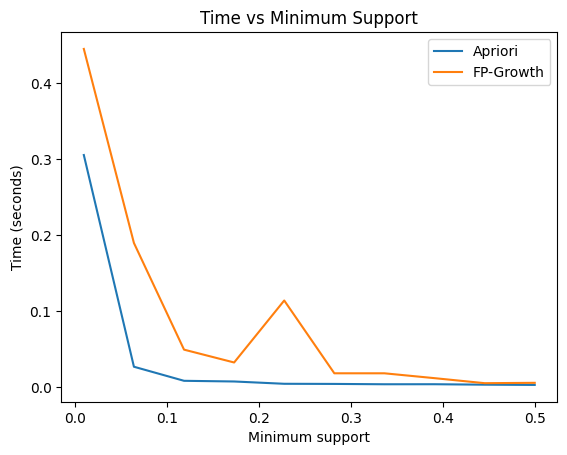

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse co

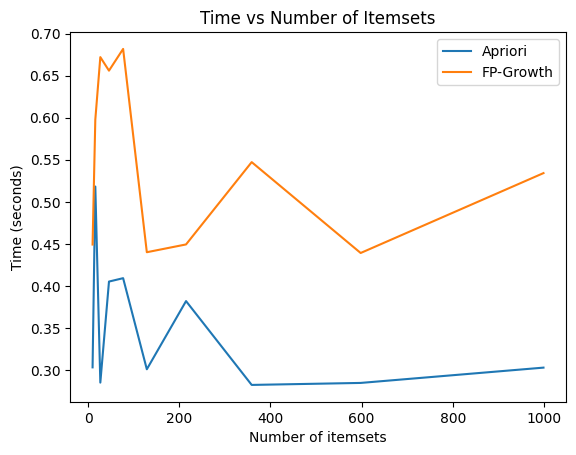

In [ ]:
# Write your code here

# time vs minimum support
min_supports = np.linspace(0.01, 0.5, 10)
apriori_times = []
fpgrowth_times = []
for min_support in min_supports:
  start_time = time.time()
  apriori(df.iloc[:,1:], min_support=min_support)
  apriori_times.append(time.time() - start_time)
  start_time = time.time()
  fpgrowth(df.iloc[:,1:], min_support=min_support)
  fpgrowth_times.append(time.time() - start_time)
plt.plot(min_supports, apriori_times, label='Apriori')
plt.plot(min_supports, fpgrowth_times, label='FP-Growth')
plt.xlabel('Minimum support')
plt.ylabel('Time (seconds)')
plt.title('Time vs Minimum Support')
plt.legend()
plt.show()

# time vs number of itemsets
num_itemsets = np.logspace(1, np.log10(999), 10, dtype=int)
apriori_times = []
fpgrowth_times = []
for n in num_itemsets:
  start_time = time.time()
  apriori(df.iloc[:,1:], min_support=0.01)
  apriori_times.append(time.time() - start_time)
  start_time = time.time()
  fpgrowth(df.iloc[:,1:], min_support=0.01)
  fpgrowth_times.append(time.time() - start_time)
plt.plot(num_itemsets, apriori_times, label='Apriori')
plt.plot(num_itemsets, fpgrowth_times, label='FP-Growth')
plt.xlabel('Number of itemsets')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Itemsets')
plt.legend()
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

# We can observe that for all values of the minimum support.
# Apriori is quicker than FP-Growth . As the minimal support decreases, the speed disparity decreases.
# For more value of minimum support both algorithms work on same pace

# When the number of transactions rises, we can see that Apriori requires less time than FP-Growth.
# The amount of transactions has an exponential effect on how long Apriori and FP-Growth takes.

## Apriori performed better in this case.
## The reasons are as follows
Main Reason : small itemsets.

Two well-liked techniques for mining frequent itemsets in a dataset are apriori and FP-growth. While FP-growth is based on creating a frequent pattern tree (FP-tree) to locate frequent itemsets, Apriori is based on creating candidate itemsets and then calculating their frequency in the dataset.

There are various circumstances when Apriori may perform better than FP-growth:

1. Sparse Datasets : Datasets with sparse information, in which there are many more transactions than items, are better suitable for Apriori. This is because FP-growth produces an FP-tree, which can become very huge and memory-intensive when dealing with sparse data, whereas Apriori generates candidate itemsets based on a priori knowledge of common itemsets.
2. Small itemsets: Apriori is more effective when the dataset contains many small itemsets because it only generates a limited number of candidate itemsets. The generation of numerous conditional pattern bases through FP-growth, in contrast, might be computationally expensive for each frequent itemset.
3. Multiple supports: Apriori can effectively manage multiple supports in a dataset by producing various sets of candidate itemsets for each support threshold. Multiple supports occur when different itemsets have different minimum support thresholds. FP-growth, on the other hand, might need to completely construct the FP-tree for each support level, which can be time- and memory-consuming.

Overall, the decision between Apriori and FP-growth is influenced by the specifics of the dataset and the current mining task. While FP-growth may be more effective in some circumstances, Apriori may perform better in others.








# REFERENCES
https://towardsdatascience.com/how-to-find-closed-and-maximal-frequent-itemsets-from-fp-growth-861a1ef13e21